## Preliminaries

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import __init__ as a
import pandas as pd
import math
a.mpl.rcParams['font.size'] = 12

### This is important

In [28]:
#Demo
a.test_rdkit_mordred() # Should show features for two molecules below.  

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


There are 2 molecules and 1826 features


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2,17.8202,15.152,0,0,29.22,2.56069,5.12137,29.22,1.27043,4.077,...,10.4037,58.1999,328.079,8.41229,1030,47,126,157,9.47222,5.11111
CC(=O)NCCC1=CNc2c1cc(OC)cc2,12.8658,11.2443,0,0,21.6032,2.42108,4.72099,21.6032,1.27077,3.74904,...,9.53727,63.2639,232.121,7.03398,561,22,84,96,5.80556,3.88889


In [29]:
#Demo
plus_carvone = 'CC1=CC[C@@H](CC1=O)C(=C)C'
minus_carvone = 'CC1=CC[C@H](CC1=O)C(=C)C'
features = a.smiles_to_mordred([plus_carvone,minus_carvone])
plus_features = features.values[0,:]
minus_features = features.values[1,:]
print("%.1f percent of Mordred features are identical between (+)-carvone and (-)-carvone." % \
      (100.0*(plus_features==minus_features).mean()))

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  5.37it/s]


There are 2 molecules and 1826 features
79.7 percent of Mordred features are identical between (+)-carvone and (-)-carvone.


In [30]:
#shadmany_smiles = a.load_other_smiles(shadmany=True)
#shadmany_data = a.load_data('shadmany')
#shadmany_data

In [31]:
coleman_smiles = a.load_other_smiles(coleman=True)
coleman_data = a.load_data("coleman")#.iloc[1:]
import numpy as np
coleman_data['N'] = np.arange(0, coleman_data.shape[0]/2, 0.5).astype(int)
coleman_data['Normalized Detection Threshold'] = coleman_data['Normalized Detection Threshold'].astype('float')
#match sutto code above to lines 261 in the init file

Loaded 454 molecules


In [32]:
coleman_data

,Molecule Name,Pubchem ID #,Note,SMILES String,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N
0,(R)-(-)-gamma-ionone,11389922,NaN,CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0
1,(S)-(+)-gamma-ionone,11194862,NaN,CC(=O)/C=C/[C@@H]1C(=C)CCCC1(C)C,7.00E-02,ppb water,0.07,"Linear, very pleasant, floral, green, woody od...",Rows 101-121 are from here: https://github.com...,0
2,(4R)-(-)-carvone,439570,NaN,CC1=CC[C@H](CC1=O)C(=C)C,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1
3,(4S)-(+)-carvone,16724,NaN,CC1=CC[C@@H](CC1=O)C(=C)C,1.30E+02,ppb,130.00,"caraway, fresh herbal",Rows 194-223 are from here: https://github.com...,1
4,"(4R,7R)-(+)-galaxolide",14177988,NaN,C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2
...,...,...,...,...,...,...,...,...,...,...
457,"(2S,3R,4E)-3-methyl-4-[(1S,2S,6S,7S)-tricyclo[...",91749106,"""""",CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,7.20E+01,ppb,72.00,woody,NaN,228
458,"(2R,3R,4E)-3-methyl-4-[(1R,2R,6R,7R)-tricyclo[...",91749106,"""""",CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,1.37E+02,ppb,137.00,"sandal(wood), floral",NaN,229
459,"(2S,3S,4E)-3-methyl-4-[(1S,2S,6S,7S)-tricyclo[...",91749106,"""""",CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,1.59E+02,ppb,159.00,very weak floral,NaN,229
460,"(2S,3S,4E)-3-methyl-4-[(1R,2R,6R,7R)-tricyclo[...",91749106,"""""",CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,4.60E+01,ppb,46.00,"strong sandal(wood), floral",NaN,230


In [33]:
def log_abs(x):
    return np.abs(np.log10(x['Normalized Detection Threshold'].values[1]/x['Normalized Detection Threshold'].values[0]))
half_coleman_dt = coleman_data.groupby('N').apply(log_abs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [34]:
#Need to only index over every other row
halfColeman_data = coleman_data.iloc[::2]

In [35]:
halfColeman_data['log_abs'] = half_coleman_dt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
halfColeman_data

,Molecule Name,Pubchem ID #,Note,SMILES String,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs
0,(R)-(-)-gamma-ionone,11389922,NaN,CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295
2,(4R)-(-)-carvone,439570,NaN,CC1=CC[C@H](CC1=O)C(=C)C,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,2.643453
4,"(4R,7R)-(+)-galaxolide",14177988,NaN,C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,0.301030
6,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,NaN
8,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,CCC[C@@H]1CCO[C@@H](S1)C,2.00E+00,ppb,2.00,"\\xe2\\x80\\x9ctypical sulfurous, with a rubbe...",Rows 424-435 are from here: https://github.com...,4,2.920819
...,...,...,...,...,...,...,...,...,...,...,...
452,"(1S,3S,1\\\'S,2\\\'R,4\\\'S,6\\\'S) (+)-erythr...",0,NaN,NaN,7.00E+00,ppb,7.00,"sandalwood like odor without moldy feeling, an...",NaN,226,NaN
454,"(2S,3R,4E)-3-methyl-4-[(1R,2R,6R,7R)-tricyclo[...",91749106,https://pubchem.ncbi.nlm.nih.gov/compound/9174...,CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,5.00E+00,ppb,5.00,"very strong, sandal(wood), animalic",NaN,227,NaN
456,"(2R,3S,4E)-3-methyl-4-[(1R,2R,6R,7R)-tricyclo[...",91749106,"""""",CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,7.00E+01,ppb,70.00,"sandal(wood), animalic",NaN,228,NaN
458,"(2R,3R,4E)-3-methyl-4-[(1R,2R,6R,7R)-tricyclo[...",91749106,"""""",CC(=O)O[C@H]1CC2CC1[C@H]3[C@@H]2CCC3,1.37E+02,ppb,137.00,"sandal(wood), floral",NaN,229,NaN


In [52]:
#halfColeman_data['SMILES String'].str.contains('nan').sum()

0

In [76]:
halfColeman_data = halfColeman_data.drop_duplicates(subset=['SMILES String'])
halfColeman_data = halfColeman_data[~halfColeman_data['SMILES String'].str.contains('NaN', na=True)]
halfColeman_data.head()

,Molecule Name,Pubchem ID #,Note,SMILES String,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs
0,(R)-(-)-gamma-ionone,11389922,NaN,CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295
2,(4R)-(-)-carvone,439570,NaN,CC1=CC[C@H](CC1=O)C(=C)C,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,2.643453
4,"(4R,7R)-(+)-galaxolide",14177988,NaN,C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,0.301030
6,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,NaN
8,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,CCC[C@@H]1CCO[C@@H](S1)C,2.00E+00,ppb,2.00,"\\xe2\\x80\\x9ctypical sulfurous, with a rubbe...",Rows 424-435 are from here: https://github.com...,4,2.920819


In [64]:
assert halfColeman_data['SMILES String'].shape == halfColeman_data['SMILES String'].unique().shape, "Number of SMILES strings should equal number of unique SMILES strings at this stage"

In [65]:
assert sum(halfColeman_data['SMILES String']=='nan') == 0, "There should be no NaN SMILES strings at this point"

In [66]:
# Compute Morgan features for DREAM molecules
#all_smiles = list(set(dream_smiles + shadmany_smiles))
#commenting everything out for now:
# dream_smiles = a.get_dream_smiles(coleman_data["Pubchem ID #"])
# all_smiles = list(set(dream_smiles + coleman_smiles))
# morgan_sim_all = a.smiles_to_morgan_sim(all_smiles,all_smiles)

In [67]:
# Compute NSPDK features for DREAM molecules
#if a.HAS_OBABEL:
#    nspdk_all = a.smiles_to_nspdk(all_smiles)
#else:
#    nspdk_all = []

In [103]:
#print([x for x in halfColeman_data["SMILES String"] if type(x) == float])
halfColeman_data.iloc[39]

Molecule Name                     (4S)-(-)-trans-limonene-1,2-oxide
Pubchem ID #                                               53713586
Note                                                            NaN
SMILES String                         CC(=C)C1CC[C@]2([C@H](C1)O2)C
Detection Threshold                                        0.00E+00
Detection Units                                                 ppb
Normalized Detection Threshold                                    0
Molecule Odour                                                  NaN
Resources                                                       NaN
N                                                                40
log_abs                                                           0
Name: 80, dtype: object

In [104]:
mordred_all = a.smiles_to_mordred(halfColeman_data['SMILES String'].values)

Convering SMILES string to Mol format...
Computing 3D coordinates...
Removing CC(=C)C1CC[C@]2([C@H](C1)O2)C due to failed embedding
Computing Mordred features...


 72%|███████▏  | 134/186 [00:07<00:29,  1.78it/s]

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 186/186 [00:07<00:00, 23.43it/s]


There are 186 molecules and 1826 features


In [109]:
halfColeman_data.shape

(187, 11)

In [108]:
mordred_all.shape

(185, 1826)

In [117]:
#Check this because I don't think the row number is not correct
all_data = halfColeman_data.set_index('SMILES String').join(mordred_all, how='inner')

In [118]:
all_data

,Molecule Name,Pubchem ID #,Note,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour,Resources,N,log_abs,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
CC(=O)/C=C/[C@H]1C(=C)CCCC1(C)C,(R)-(-)-gamma-ionone,11389922,NaN,1.10E+01,ppb water,11.00,"Weak green, fruity, pineapple-like odor with m...",Rows 66-100 are from here: https://www.jstage....,0,2.196295,...,9.50144,45.5963,192.151,5.65151,301,19,68,76,6.64583,3.06944
CC1=CC[C@H](CC1=O)C(=C)C,(4R)-(-)-carvone,439570,NaN,2.00E+00,ppb,2.00,"sweet spearmint, fresh herbal",Rows 122 - 193 are from here: https://github.c...,1,2.643453,...,9.07142,40.9913,150.104,6.00418,152,14,52,58,5.19444,2.47222
C[C@H]1COCC2=CC3=C(C=C12)C([C@H](C3(C)C)C)(C)C,"(4R,7R)-(+)-galaxolide",14177988,NaN,4.40E-01,ppb in air,0.44,weak to almost odorless,Rows 224-267 are from here: https://github.com...,2,0.301030,...,10.3832,68.8592,258.198,5.73774,595,39,112,141,8.04167,3.83333
C[C@@H]1CC(=O)C=C2[C@]1(C[C@@H](CC2)C(=C)C)C,"(4R,4aS,6R)-(+) nootkatone",1268142,NaN,1.50E+01,ppm,15000.00,grapefruit odor,Rows 370-407 are from here: https://github.com...,3,NaN,...,9.97883,49.2196,218.167,5.74124,397,28,86,103,6.86806,3.40278
CCC[C@@H]1CCO[C@@H](S1)C,"(2S,4R)-(+) cis-2-methyl-4-propyl-1,3-oxathiane",6931728,NaN,2.00E+00,ppb,2.00,"\\xe2\\x80\\x9ctypical sulfurous, with a rubbe...",Rows 424-435 are from here: https://github.com...,4,2.920819,...,8.66751,38.7042,160.092,6.15739,124,10,44,47,3.72222,2.41667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C[C@@H]1CC(=O)C[C@H]2[C@]1(C[C@@H](CC2)C(=C)C)C,"(+)-8-Dehydro-11,12-dihydronootkatone",71587038,http://www.thegoodscentscompany.com/data/rw103...,5000-10000,NaN,NaN,"On an odor rating scale: fresh, green, sour, d...",NaN,217,NaN,...,9.97883,49.2196,220.183,5.50457,397,28,86,103,6.86806,3.40278
C[C@]12CC[C@H]3[C@H]([C@@H]1CC=C2)CC[C@@H]4[C@@]3(CCC(=O)C4)C,(+)-androstenone,6852393,NaN,1.80E-01,ppb,NaN,strong urine odor,NaN,219,NaN,...,10.4599,69.1263,272.214,5.67113,699,40,120,151,6.18056,4.09722
CC/C(=C\\CC1CC=C(C1(C)C)C)/CO,"(1\\\'R,E)-(+)-2-Methyl-4-(2\\\',2\\\',3\\\'-t...",6438196,http://www.thegoodscentscompany.com/data/rw100...,5.40E+01,ppb,NaN,fresh and strong sandalwood oil odor associate...,NaN,221,NaN,...,9.50084,61.0253,208.183,5.33802,387,21,72,83,6.89583,3.5
CC1=CC[C@H](C1(C)C)CC[C@@H](C)CO,"(-)-(2R)-2-methyl-4-[(1R)-2,2,3-trimethylcyclo...",1747970,NaN,1.87E+01,ppb,NaN,peculiar sandalwood\\\'s strongly excellent smell,NaN,223,NaN,...,9.45399,59.7573,196.183,5.1627,317,19,68,78,6.64583,3.16667


In [91]:
#BELOW IS CODE THAT i AM NOT CURRENTLY USING

In [21]:
# Combine all DREAM molecular features into one dataframe
molecular_data_all = dragon_all.join(nspdk_all).join(morgan_sim_all).astype('float')

In [22]:
molecular_data_dream = molecular_data_all.loc[dream_smiles]
# Reindex by the CIDs instead of the SMILES strings
assert list(molecular_data_dream.index)==dream_smiles
molecular_data_dream.index = dream_CIDs

In [23]:
# Compute the final DREAM molecular features matrix.  
X_dream,good1,good2,means,stds,imputer = a.dream.make_X(molecular_data_dream,dream_CID_dilutions)

The X matrix now has shape (952x1697) molecules by non-NaN good molecular descriptors


In [24]:
dummy_intensity = -3.0
shadmany_CIDs = [shadmany_data.loc[smile]['Pubchem ID #'] for smile in shadmany_smiles]
shadmany_CID_dilutions = [(shadmany_data.loc[smile]['Pubchem ID #'],dummy_intensity) for smile in shadmany_smiles]
molecular_data_shadmany = molecular_data_all.loc[shadmany_smiles]
assert list(molecular_data_shadmany.index) == shadmany_smiles
molecular_data_shadmany.index = shadmany_CIDs
X_shadmany = a.dream.make_X(molecular_data_shadmany,shadmany_CID_dilutions,
                            good1=good1,good2=good2,means=means,stds=stds)[0]
# Reorder molecules to match the order in the spreadsheet
X_shadmany = X_shadmany.loc[[(cid,dummy_intensity) for cid in shadmany_data['Pubchem ID #']]]
# Confirm that the order matches
assert list(X_shadmany.index.get_level_values('CID')) == list(shadmany_data['Pubchem ID #'])

The X matrix now has shape (32x1697) molecules by non-NaN good molecular descriptors


## Fit model to DREAM data

In [25]:
# Model for DREAM data
rfs = {}
n_estimators = 25
these_descriptors = a.descriptors[:1] # Just intensity
Y_dream_mean = Y_dream.stack('Descriptor').mean(axis=1).unstack('Descriptor')
for i,descriptor in enumerate(these_descriptors):
    print("%d. Fitting model for %s..." % (i+1,descriptor))
    rfs[descriptor] = a.RandomForestRegressor(n_estimators=n_estimators)
    valid = Y_dream_mean[descriptor].notnull()
    rfs[descriptor].fit(X_dream.loc[valid].as_matrix(),Y_dream_mean[descriptor].loc[valid].as_matrix())

1. Fitting model for Intensity...


In [26]:
# Check model quality by cross-validation on the DREAM data.  
from sklearn.model_selection import GroupShuffleSplit
x = X_dream.loc[valid]
y = Y_dream_mean[descriptor].loc[valid]
groups = x.index.get_level_values('CID')
ss = GroupShuffleSplit(n_splits=3)
for train,test in ss.split(x,groups=groups):
    rfs['Intensity'] = a.RandomForestRegressor(n_estimators=25,random_state=0)
    rfs['Intensity'].fit(x.iloc[train].as_matrix(),y.iloc[train].as_matrix())
    predicted = rfs['Intensity'].predict(x.iloc[test].as_matrix())
    observed = y.iloc[test]
    print(a.np.corrcoef(predicted,observed)[0,1])

0.693696324394
0.663224096853
0.651281217356


## Compute predictions and display

t=-10.354, p=6.46e-23


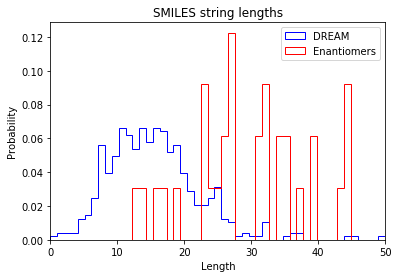

In [27]:
a.compare_smiles_lengths(dream_smiles,shadmany_smiles,['DREAM','Enantiomers']);

t=-3.964, p=8.42e-05


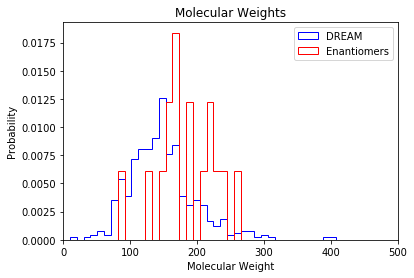

In [28]:
a.compare_molecular_weights(molecular_data_dream,molecular_data_shadmany,['DREAM','Enantiomers']);

In [29]:
predictions = a.make_predictions(rfs,X_shadmany,['Intensity'])

In [30]:
plus_pred = predictions.iloc[0::2]['Intensity'].values
minus_pred = predictions.iloc[1::2]['Intensity'].values

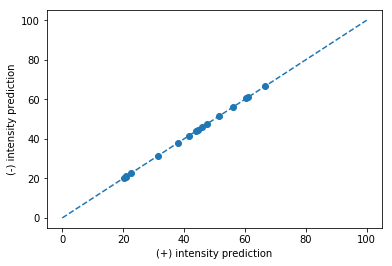

In [31]:
a.plt.scatter(plus_pred,minus_pred)
a.plt.plot([0,100],[0,100],'--')
a.plt.xlabel('(+) intensity prediction')
a.plt.ylabel('(-) intensity prediction')
a.plt.show()

In [32]:
plus_thresh = shadmany_data.iloc[0::2]['Normalized Detection Threshold'].values
minus_thresh = shadmany_data.iloc[1::2]['Normalized Detection Threshold'].values
plus_thresh = a.np.clip(plus_thresh,1e-8,1e8)
minus_thresh = a.np.clip(minus_thresh,1e-8,1e8)

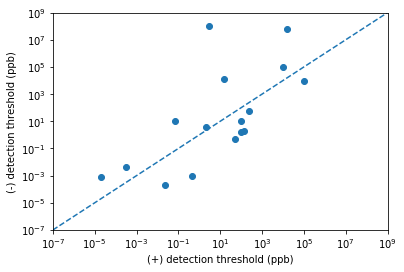

In [33]:
a.plt.scatter(plus_thresh,minus_thresh)
a.plt.plot([1e-7,1e9],[1e-7,1e9],'--')
a.plt.xlim(1e-7,1e9)
a.plt.ylim(1e-7,1e9)
a.plt.xscale('log')
a.plt.yscale('log')
a.plt.xlabel('(+) detection threshold (ppb)')
a.plt.ylabel('(-) detection threshold (ppb)')
a.plt.show()

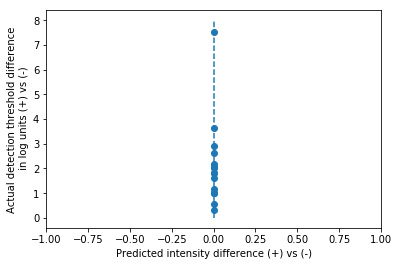

In [34]:
delta_pred = plus_pred - minus_pred
delta_thresh = a.np.log10(minus_thresh / plus_thresh)
inds = delta_thresh.argsort()
delta_pred = delta_pred[inds]
delta_thresh = delta_thresh[inds]
negative = delta_thresh < 0
delta_thresh[negative] *= -1
delta_pred[negative] *= -1
a.plt.scatter(delta_pred,delta_thresh)
a.plt.xlabel('Predicted intensity difference (+) vs (-)')
a.plt.ylabel('Actual detection threshold difference\n in log units (+) vs (-)')
a.plt.plot([0,0],[0,8],'--')
a.plt.xlim(-1,1)
a.plt.show()

In [35]:
print("Correlation coefficient R = %.3f" % a.np.corrcoef(delta_pred,delta_thresh)[0,1])

Correlation coefficient R = nan


/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


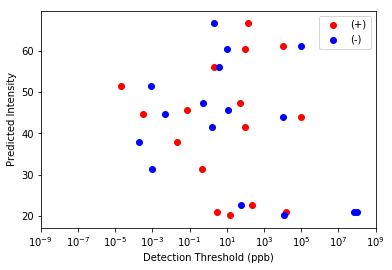

Correlation between predicted intensity and actual detection thresholds is R=-0.359


In [36]:
a.plt.scatter(plus_thresh,plus_pred,color='r',label='(+)')
a.plt.scatter(minus_thresh,minus_pred,color='b',label='(-)')
a.plt.xscale('log')
a.plt.xlim(1e-9,1e9)
a.plt.xlabel('Detection Threshold (ppb)')
a.plt.ylabel('Predicted Intensity')
a.plt.legend()
a.plt.show()
print("Correlation between predicted intensity and actual detection thresholds is R=%.3f" % \
      a.np.corrcoef(a.np.concatenate((plus_thresh,minus_thresh)),a.np.concatenate((plus_pred,minus_pred)))[0,1])